In [24]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device

device(type='cpu')

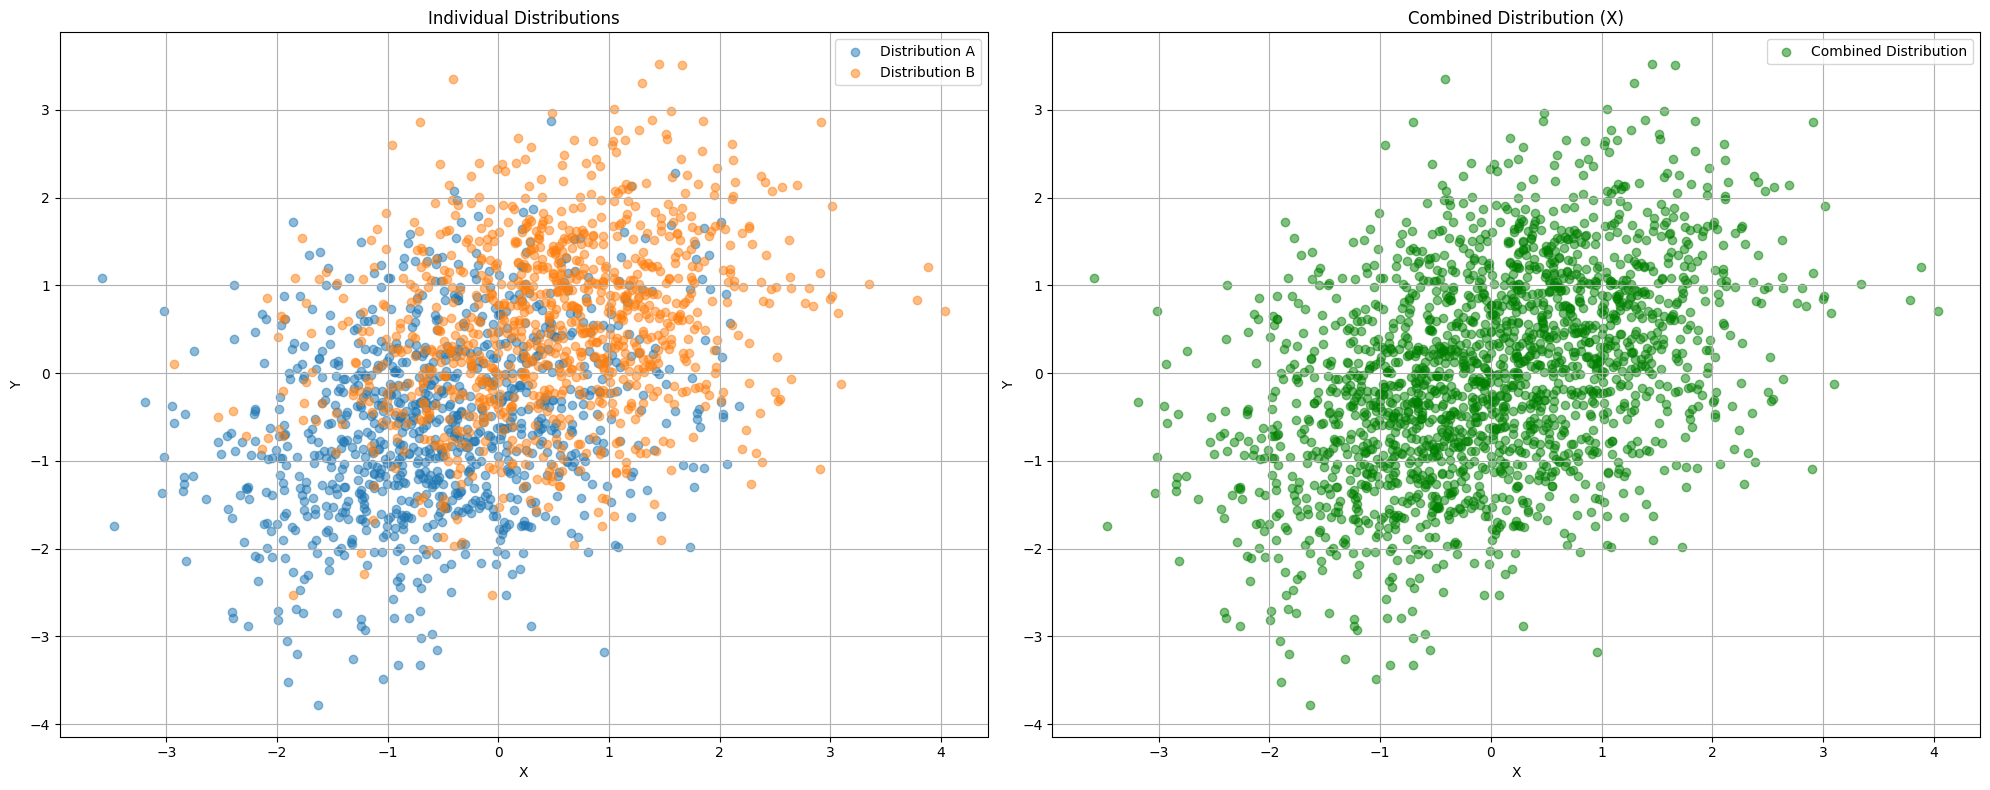

Shape of X: torch.Size([2000, 2])


In [25]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(77)

m = 1000
mu_A = torch.tensor([-0.5, -0.5])
mu_B = torch.tensor([0.5, 0.5])
cov = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

# Generate Samples
dist_A = torch.distributions.MultivariateNormal(mu_A, cov)
dist_B = torch.distributions.MultivariateNormal(mu_B, cov)

samples_A = dist_A.sample((m,))
samples_B = dist_B.sample((m,))

# Stack Samples into Single Tensor X
X = torch.cat((samples_A, samples_B), dim=0)

# Create Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot Individual Distributions
ax1.scatter(samples_A[:, 0], samples_A[:, 1], alpha=0.5, label='Distribution A')
ax1.scatter(samples_B[:, 0], samples_B[:, 1], alpha=0.5, label='Distribution B')
ax1.set_title('Individual Distributions')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()
ax1.grid(True)

# Plot Combined Tensor X
ax2.scatter(X[:, 0], X[:, 1], alpha=0.5, c='green', label='Combined Distribution')
ax2.set_title('Combined Distribution (X)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"Shape of X: {X.shape}")

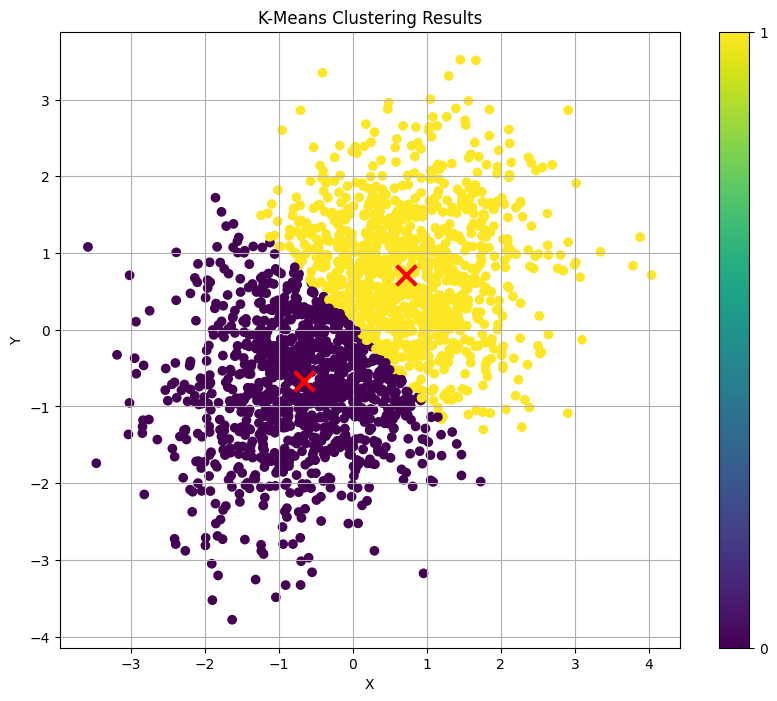

Cluster centroids:
tensor([[-0.6654, -0.6662],
        [ 0.7136,  0.7145]])


In [26]:
import torch
import matplotlib.pyplot as plt

def kmeans(X, k, max_iters=100, convergence_threshold=1e-4):
    # Normalize the Data
    X = (X - X.mean(dim=0)) / X.std(dim=0)
    
    # Initialize Random Centroids
    centroids = X[torch.randperm(X.shape[0])[:k]]
    
    for _ in range(max_iters):
        # Label Each Data Point
        distances = torch.cdist(X, centroids)
        labels = torch.argmin(distances, dim=1)
        
        # Update Centroids
        new_centroids = torch.stack([X[labels == i].mean(dim=0) for i in range(k)])
        
        # Check for convergence
        if torch.all(torch.abs(new_centroids - centroids) < convergence_threshold):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Perform k-means Clustering
k = 2  # Number of Clusters
labels, centroids = kmeans(X, k)

# Visualize the results
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-Means Clustering Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(ticks=range(k))
plt.grid(True)
plt.show()

print(f"Cluster centroids:\n{centroids}")

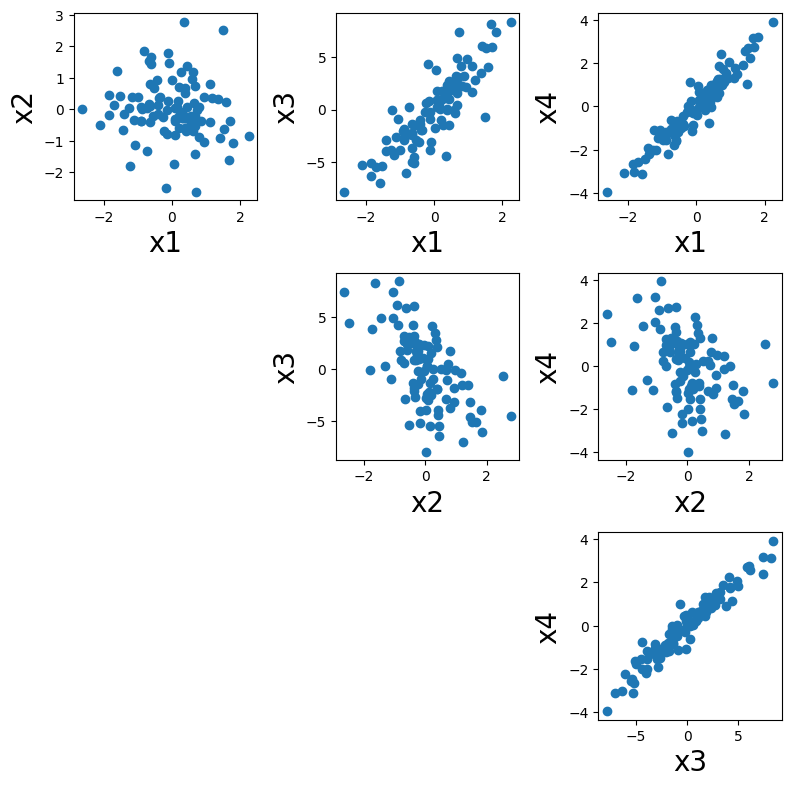

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
X = np.random.normal(0, 1, (100, 4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + np.random.normal(0, 0.1, 100)
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + np.random.normal(0, 0.1, 100)

# Set Mean to Zero
X = X - np.mean(X, axis=0)

plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(X[:,i], X[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

In [28]:
cov_matrix = sum([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]) / 100
eigvecs = np.linalg.eig(cov_matrix)
ordering = np.argsort(eigvecs[0])[::-1]
principal_comps_byhand = eigvecs[1][:,ordering]
principal_comps_byhand

array([[ 0.20904599, -0.47925807, -0.14721012, -0.83960744],
       [-0.13276933, -0.79498438, -0.34473811,  0.48117334],
       [ 0.89018124,  0.14169594, -0.3801107 ,  0.20740173],
       [ 0.38242573, -0.34385143,  0.84557713,  0.14323436]])